In [1]:
from HeaderP import *

In [3]:
lmc = readfits('apogee_lmc.fits')

<AxesSubplot:>

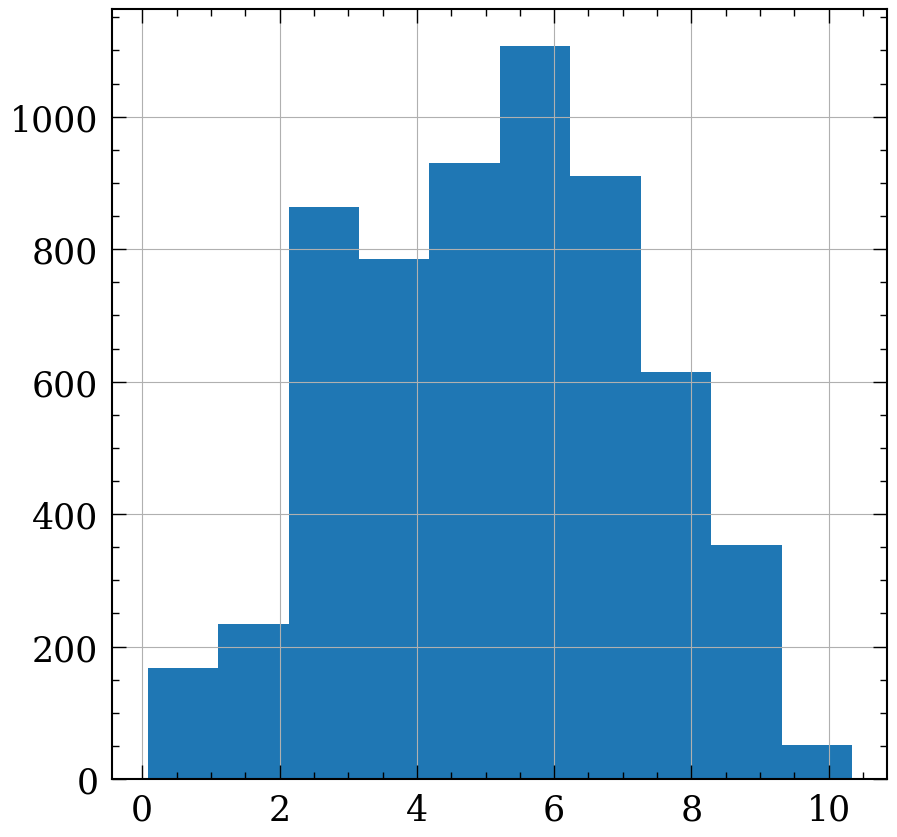

In [145]:
lmc['rlmc'].hist()

Text(0, 0.5, '[Fe/H]')

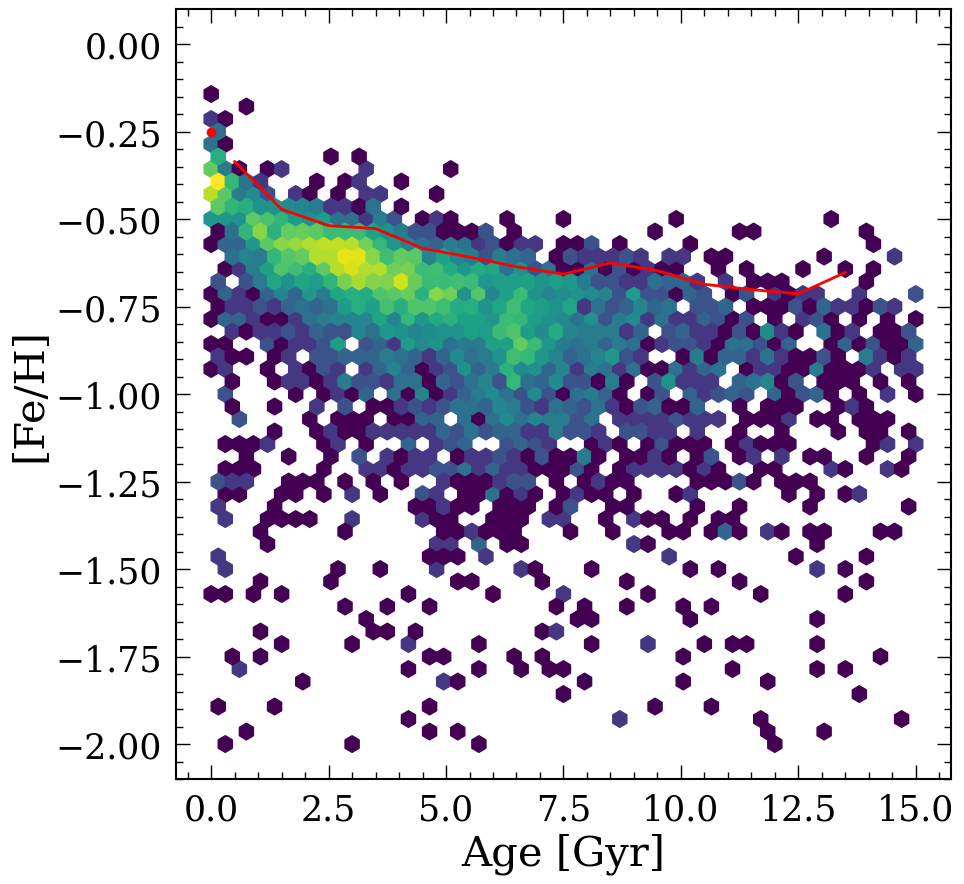

In [200]:
agebins = np.linspace(0,14,15)
feh0 = np.zeros(len(agebins)-1)

plt.hexbin(lmc['age'], lmc['feh'],
        extent=(0,15,-2,0), gridsize=50, bins='log',
          mincnt=1)

for i in range(len(agebins)-1):
    m = (lmc['age']>agebins[i])&(lmc['age']<agebins[i+1])
    feh0[i] = np.percentile(lmc['feh'][m], 95)

    
plt.plot(agebins[1:]/2+agebins[:-1]/2, feh0, 'r-')
plt.plot(0, -0.25 ,'ro')

plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')

 
-0.1048 x - 0.1456 -0.10484917236827908


Text(0, 0.5, '[Fe/H]')

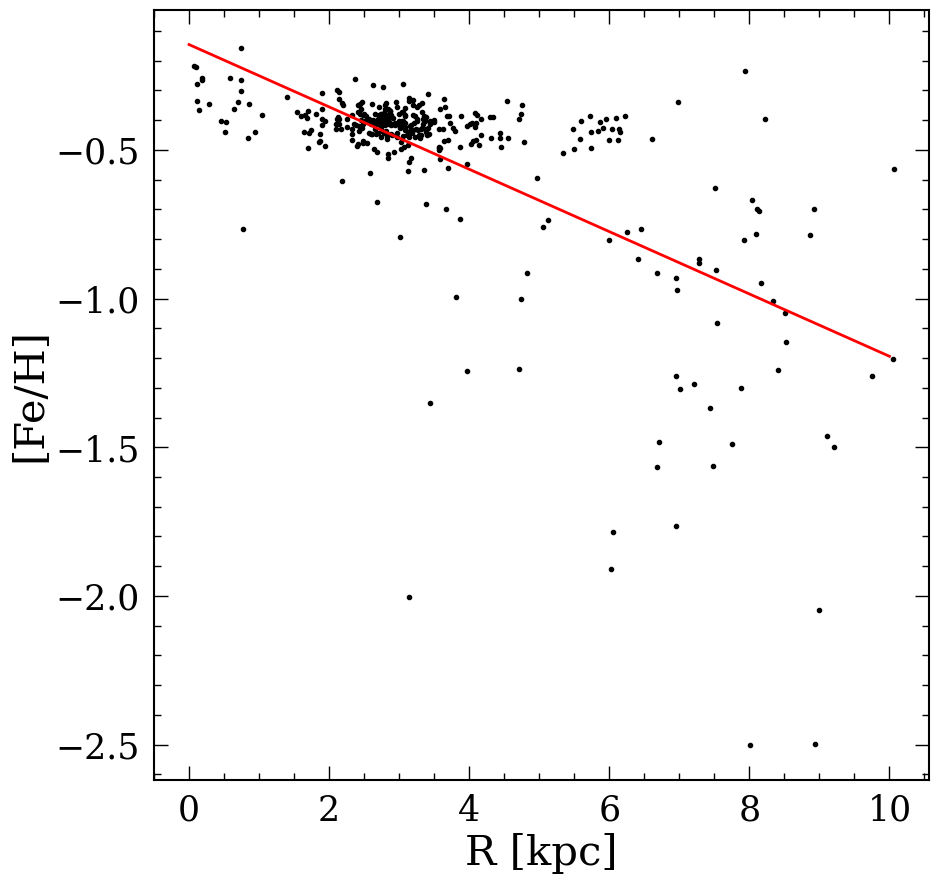

In [201]:
agecut = 0.5
plt.plot(lmc['rlmc'][lmc['age']<agecut], lmc['feh'][lmc['age']<agecut], 'k.')
p=fitpoints(lmc['rlmc'][lmc['age']<agecut], lmc['feh'][lmc['age']<agecut],1)
plt.plot(np.linspace(0,10,100), p(np.linspace(0,10,100)), 'r-')
print(p, p[1])
plt.xlabel('R [kpc]')
plt.ylabel('[Fe/H]')

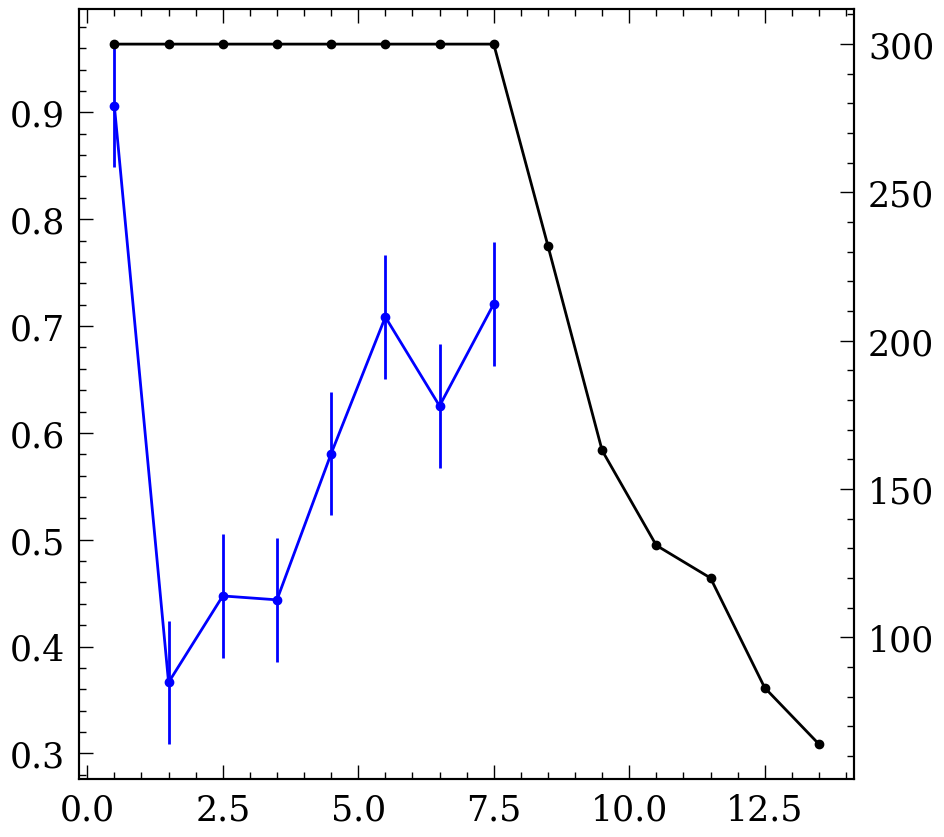

In [202]:
import random
Nostar = 300
scatters = np.zeros(len(agebins)-1)
scatters_err = np.zeros(len(agebins)-1)
nostar = np.zeros(len(agebins)-1)
for i in range(len(agebins)-1):
    m = (lmc['age']>agebins[i])&(lmc['age']<agebins[i+1])
    if sum(m)<Nostar:
        scatters[i] = np.nan
        scatters[i] = np.nan
        nostar[i] = sum(m)
        continue
    else:
        ar = np.array(range(len(lmc)))[m]
        random.shuffle(ar)
        pickstar = ar[:Nostar]
        scatters[i] = np.percentile(lmc['feh'].iloc[pickstar], 95)-np.percentile(lmc['feh'].iloc[pickstar], 5)
        scatters_err[i] = 1/np.sqrt(len(pickstar))
        nostar[i] = len(pickstar)
plt.errorbar(agebins[1:]/2+agebins[:-1]/2, scatters, yerr=scatters_err,
             fmt='bo-')
plt.twinx()
plt.plot(agebins[1:]/2+agebins[:-1]/2, nostar, 'k-o')


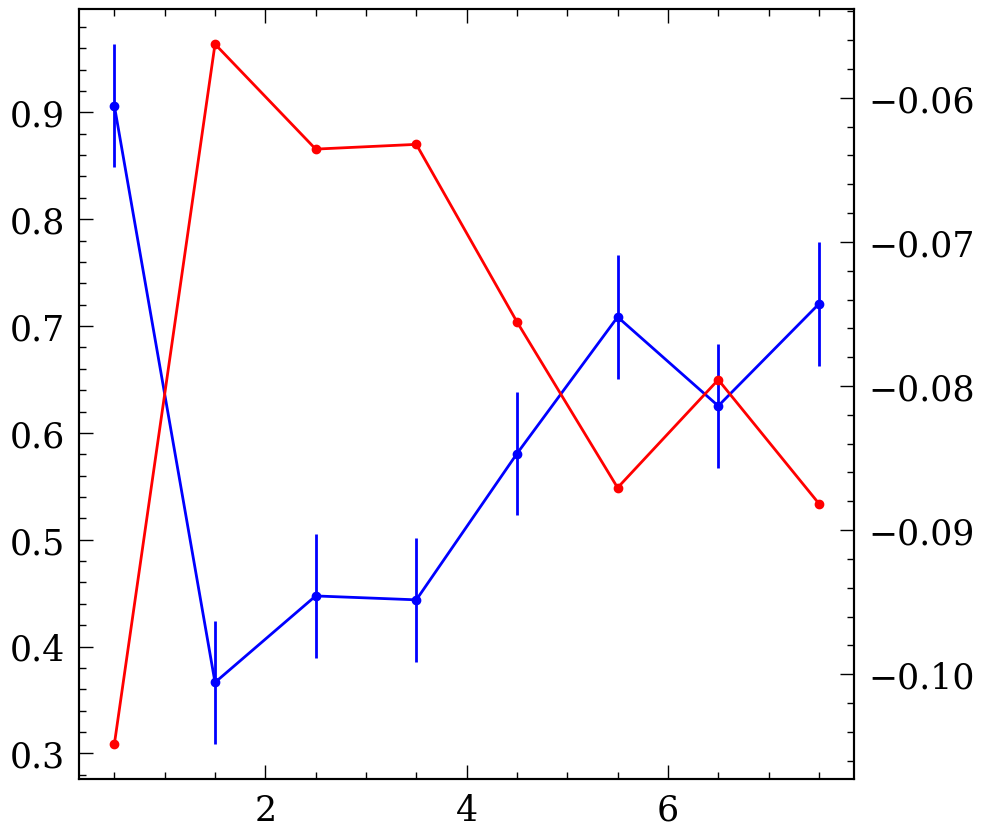

In [203]:
a = -0.09
slope = a*scatters+(p[1]-a*scatters[0])

plt.errorbar(agebins[1:]/2+agebins[:-1]/2, scatters, yerr=scatters_err,
             fmt='bo-')
plt.twinx()
plt.plot(agebins[1:]/2+agebins[:-1]/2, slope, 'r-o')




In [204]:
def getRb(age, feh, func_m, func_b):
    Rb = np.zeros(len(age))
    for i in trange(len(age)):
        try:
            m = func_m(age[i])
            b = func_b(age[i])
            Rb[i] = (feh[i]-b)/m
        except:
            Rb[i] = np.nan
    return Rb


In [205]:
m = interp1d(np.append([0],agebins[1:]/2+agebins[:-1]/2), np.append(p[1],slope))
b = interp1d(np.append([0],agebins[1:]/2+agebins[:-1]/2), np.append(-0.25,feh0))
lmc['Rb'] = getRb(lmc['age'], lmc['feh'], m, b)


100%|███████████████████████████████████████████████████████████████████████████████████████████| 6019/6019 [00:00<00:00, 47132.03it/s]


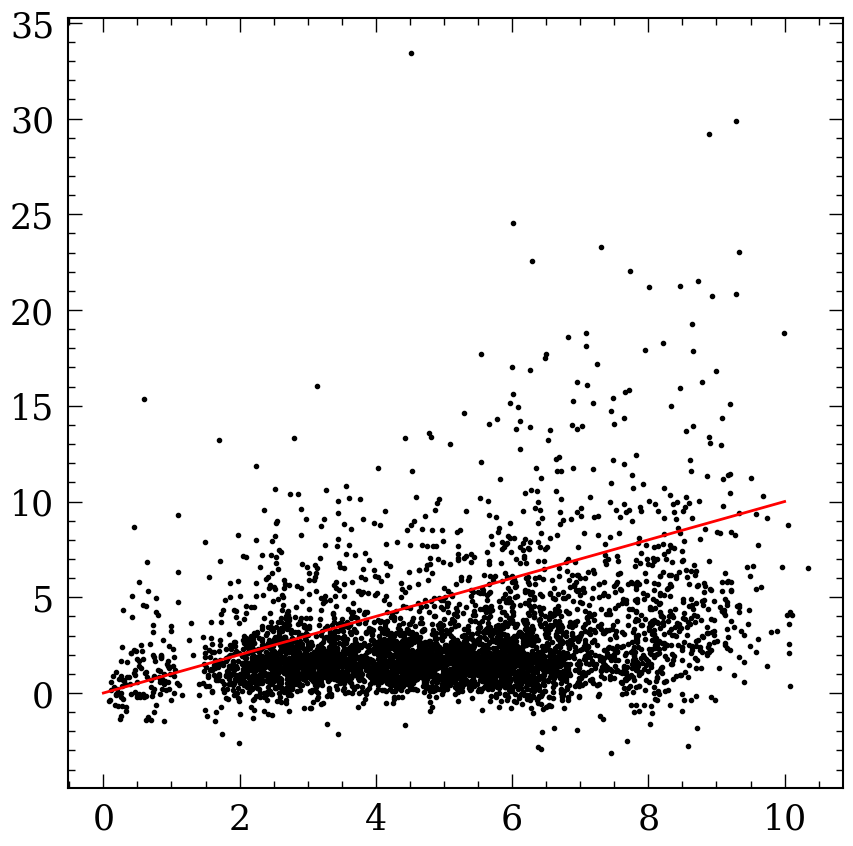

In [206]:
plt.plot(lmc['rlmc'], lmc['Rb'], 'k.')
plt.plot([0,10],[0,10], 'r-')

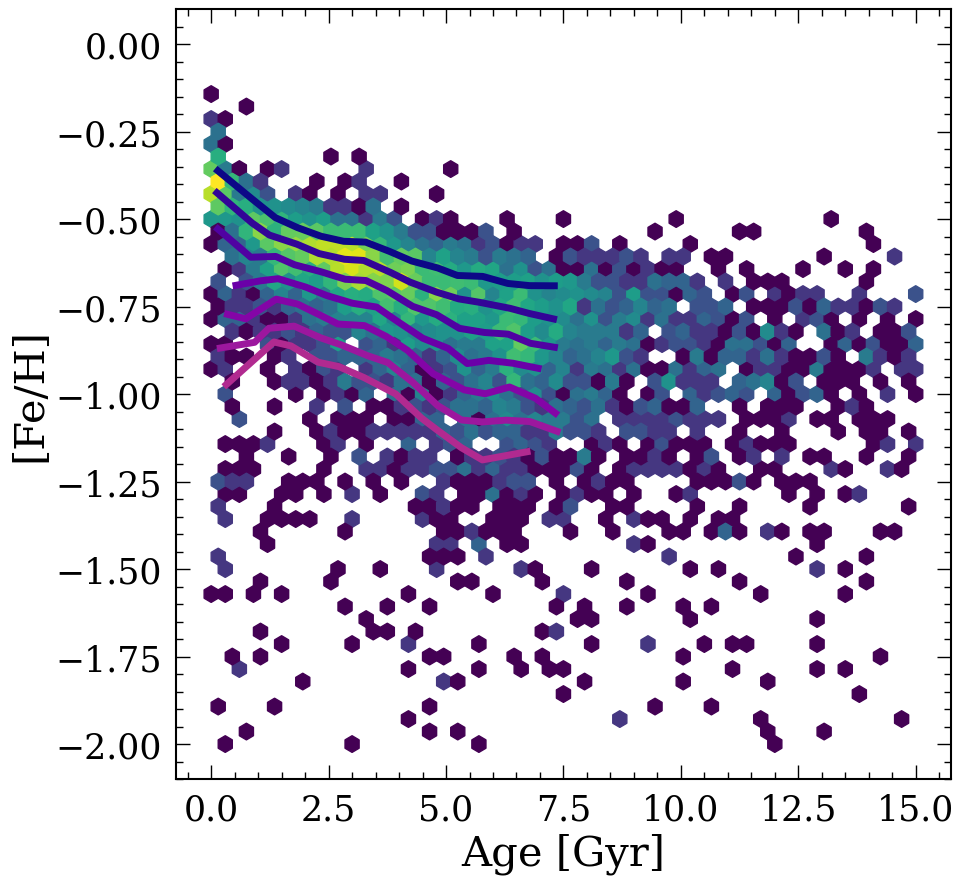

In [207]:
Rbbin = np.linspace(0,15,16)
agebins = np.linspace(0,14,15)
feh0 = np.zeros(len(agebins)-1)

plt.hexbin(lmc['age'], lmc['feh'],
        extent=(0,15,-2,0), gridsize=50, bins='log',
          mincnt=1)
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')

colors = getcolor(Rbbin)
for i in range(len(Rbbin)-1):
    m = (lmc['Rb']>Rbbin[i])&(lmc['Rb']<Rbbin[i+1])
    if sum(m)<100:
        continue
    age, feh = zip(*sorted(zip(lmc['age'].values[m], lmc['feh'].values[m])))
    age, feh = np.array(age), np.array(feh)
    age, feh = movingMed_time(age, feh,
                             0.1,0.5)
    age, feh = age[feh!=0], feh[feh!=0]
    plt.plot(age, feh, color=colors[i], linewidth=5)


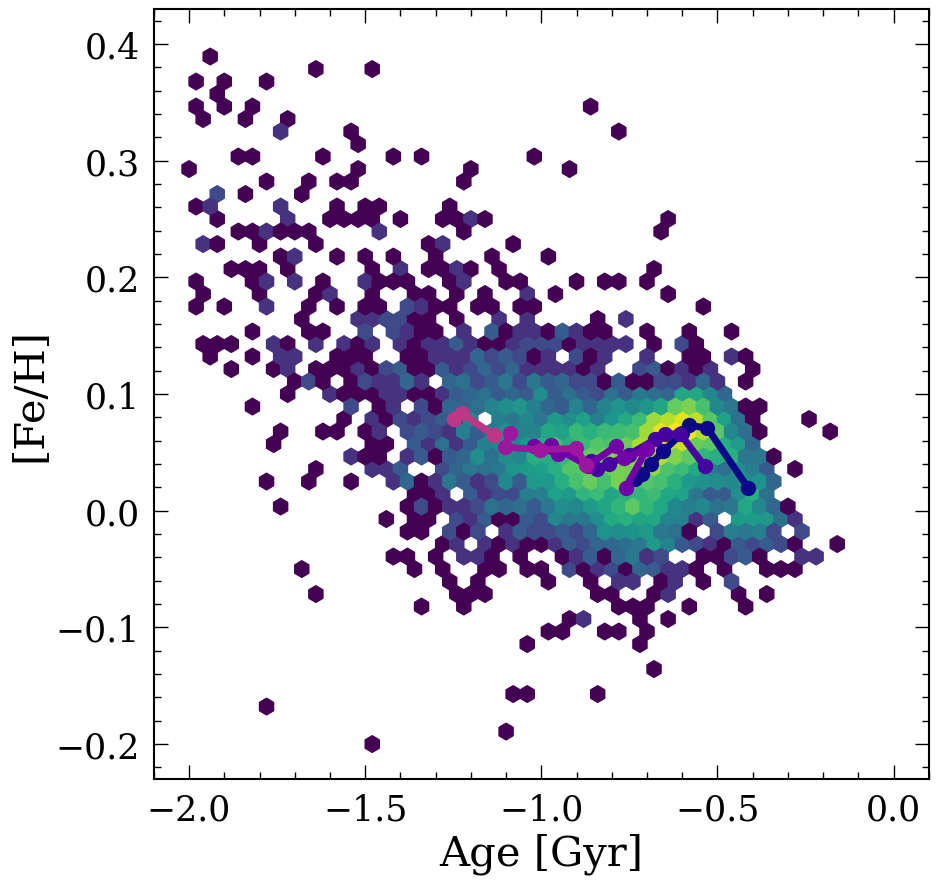

In [208]:
Rbbin = np.linspace(0,15,10)

plt.hexbin(lmc['feh'], lmc['alphafe'],
        extent=(-2,0,-0.2,0.4), gridsize=50, bins='log',
          mincnt=1)
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')

colors = getcolor(Rbbin)
for i in range(len(Rbbin)-1):
    m = (lmc['Rb']>Rbbin[i])&(lmc['Rb']<Rbbin[i+1])
    feh_sing = np.zeros(len(agebins)-1)
    afe_sing = np.zeros(len(agebins)-1)
    for j in range(len(agebins)-1):
        m2 = m&(lmc['age']>agebins[j])&(lmc['age']<agebins[j+1])
        if sum(m2)<20:
            feh_sing[j] = np.nan
            afe_sing[j] = np.nan
            continue
        feh_sing[j] = np.median(lmc['feh'].values[m2])
        afe_sing[j] = np.median(lmc['alphafe'].values[m2])
            
        
    plt.plot(feh_sing, afe_sing, 'o-',
            color=colors[i], linewidth=5,
            markersize=10)


